<a href="https://colab.research.google.com/github/nickimps/Permanent-Magnet-Synchronous-Motor-Temperature-Estimation/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

Nicholas Imperius 0645031\
Jimmy Tsang 1098204

Initial findings and Samples of data

# Initialization

**Mounting Google Drive, Importing Libraries, Load Data**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# load measures_v2.csv dataset
measures_df = pd.read_csv('/content/drive/MyDrive/ESOF-3675/Project/measures_v2.csv')

# Data Visualization

**Display Data**

In [ ]:
# display mode of each column
measures_df.mode()

u_q    coolant  stator_winding         u_d  stator_tooth  \
0  131.798355  56.105484      104.791176 -130.420517     45.986176   
1  131.800491        NaN             NaN -130.376266           NaN   
2         NaN        NaN             NaN -130.006180           NaN   
3         NaN        NaN             NaN -129.996704           NaN   
4         NaN        NaN             NaN  -85.280678           NaN   
5         NaN        NaN             NaN   -7.615849           NaN   

   motor_speed        i_d         i_q         pm  stator_yoke   ambient  \
0  4999.945801 -43.511795  132.617706  86.033969     19.85062  19.85062   
1          NaN        NaN         NaN        NaN          NaN       NaN   
2          NaN        NaN         NaN        NaN          NaN       NaN   
3          NaN        NaN         NaN        NaN          NaN       NaN   
4          NaN        NaN         NaN        NaN          NaN       NaN   
5          NaN        NaN         NaN        NaN          NaN       NaN   

          torque  profile_id  
0 -3.705492e-320        20.0  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
5            NaN         NaN

In [ ]:
# Provides crucial information about each variable
measures_df.describe()

u_q       coolant  stator_winding           u_d  stator_tooth  \
count  1.330816e+06  1.330816e+06    1.330816e+06  1.330816e+06  1.330816e+06   
mean   5.427900e+01  3.622999e+01    6.634275e+01 -2.513381e+01  5.687858e+01   
std    4.417323e+01  2.178615e+01    2.867206e+01  6.309197e+01  2.295223e+01   
min   -2.529093e+01  1.062375e+01    1.858582e+01 -1.315304e+02  1.813398e+01   
25%    1.206992e+01  1.869814e+01    4.278796e+01 -7.869090e+01  3.841601e+01   
50%    4.893818e+01  2.690014e+01    6.511013e+01 -7.429755e+00  5.603635e+01   
75%    9.003439e+01  4.985749e+01    8.814114e+01  1.470271e+00  7.558668e+01   
max    1.330370e+02  1.015985e+02    1.413629e+02  1.314698e+02  1.119464e+02   

        motor_speed           i_d           i_q            pm   stator_yoke  \
count  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06   
mean   2.202081e+03 -6.871681e+01  3.741278e+01  5.850678e+01  4.818796e+01   
std    1.859663e+03  6.493323e+01  9.218188e+01  1.900150e+01  1.999100e+01   
min   -2.755491e+02 -2.780036e+02 -2.934268e+02  2.085696e+01  1.807669e+01   
25%    3.171107e+02 -1.154061e+02  1.095863e+00  4.315158e+01  3.199033e+01   
50%    1.999977e+03 -5.109376e+01  1.577401e+01  6.026629e+01  4.562551e+01   
75%    3.760639e+03 -2.979688e+00  1.006121e+02  7.200837e+01  6.146083e+01   
max    6.000015e+03  5.189670e-02  3.017079e+02  1.136066e+02  1.011480e+02   

            ambient        torque    profile_id  
count  1.330816e+06  1.330816e+06  1.330816e+06  
mean   2.456526e+01  3.110603e+01  4.079306e+01  
std    1.929522e+00  7.713575e+01  2.504549e+01  
min    8.783478e+00 -2.464667e+02  2.000000e+00  
25%    2.318480e+01 -1.374265e-01  1.700000e+01  
50%    2.479733e+01  1.086035e+01  4.300000e+01  
75%    2.621702e+01  9.159718e+01  6.500000e+01  
max    3.071420e+01  2.610057e+02  8.100000e+01

In [ ]:
# Provides the number of profiles as well as the average profile length
profileCounts = measures_df.groupby('profile_id')['u_q'].agg('count')
profileCounts.describe()

count       69.000000
mean     19287.188406
std       9606.729772
min       2176.000000
25%      14403.000000
50%      17142.000000
75%      23761.000000
max      43971.000000
Name: u_q, dtype: float64

**Profile Times**\
In the plot below, you can see every profile that was run. We started by taking 
the count of each profile, since each profile runs for 0.5 seconds, if we had a profile with a 1000 count, that would have taken 500 seconds. To make this look readable, we turned the seconds value into an hours value on the x-axis. 

*Time vs Profile ID*\
Here we are plotting the length of each profile

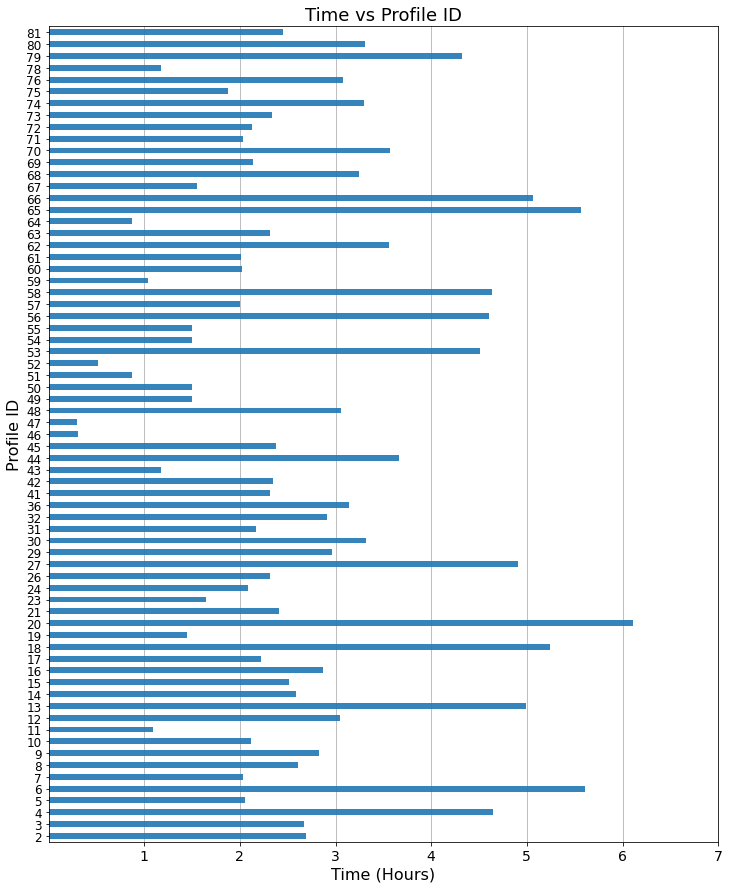

In [ ]:
# Load the grouping of profile ids and there accounts into a variable
profileCounts = measures_df.groupby('profile_id')['u_q'].agg('count')

# Plot the profile ids and time on a bar graph
plot = profileCounts.plot.barh(figsize=(12, 15), title='Time vs Profile ID', alpha=0.9)

# Change the ticks on the left side to hours and not seconds.
# To do this, since it is sampled every 0.5 seconds
# We do [profileTimeInSeconds] * 1/0.5 * 60 seconds to a min * 60 mins to an hour * np.arange(which creates the appropriate scale)
plot.set_xticks((1/0.5) * 60 * 60 * np.arange(1,8))

# Set the labels to be hours from 1 to 7
plot.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8])

# Label the axis
plt.xlabel('Time (Hours)', fontsize=16)
plt.ylabel('Profile ID', fontsize=16)
plt.title('Time vs Profile ID', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

# Show horizontal lines
plt.grid(axis='x')

# Make the grid lines show behind the bars
plot.set_axisbelow(True)

# Show the plot
plt.show()


*Frequency vs Time*\
Here we are plotting the frequency of the profile lengths.

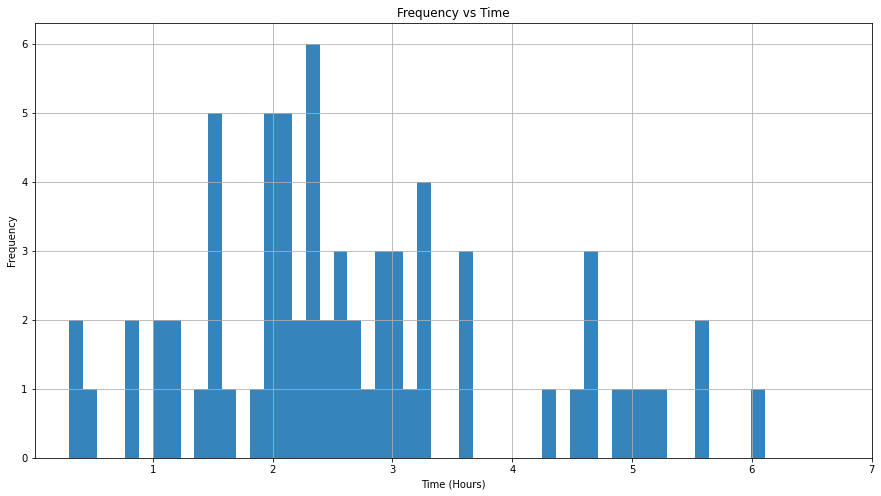

In [ ]:
# Load the grouping of profile ids and there accounts into a variable
profileCounts = measures_df.groupby('profile_id')['u_q'].agg('count')

# Plot the frequency of the profile times on a histogram
plot = profileCounts.plot.hist(figsize=(15, 8), title='Frequency vs Time', bins=50, alpha=0.9)

# Change the ticks on the left side to hours and not seconds.
# To do this, since it is sampled every 0.5 seconds
# We do [profileTimeInSeconds] * 1/0.5 * 60 seconds to a min * 60 mins to an hour * np.arange(which creates the appropriate scale)
plot.set_xticks((1/0.5) * 60 * 60 * np.arange(1,8))

# Set the labels to be hours from 1 to 7
plot.set_xticklabels(list(range(1, 8)))

# Show grid lines
plt.grid(True)

# Label x-axis
plot.set_xlabel('Time (Hours)')

# Show the plot
plt.show()

**Linear Correlation**\
In the pairplot you can see the correlation of each variable.

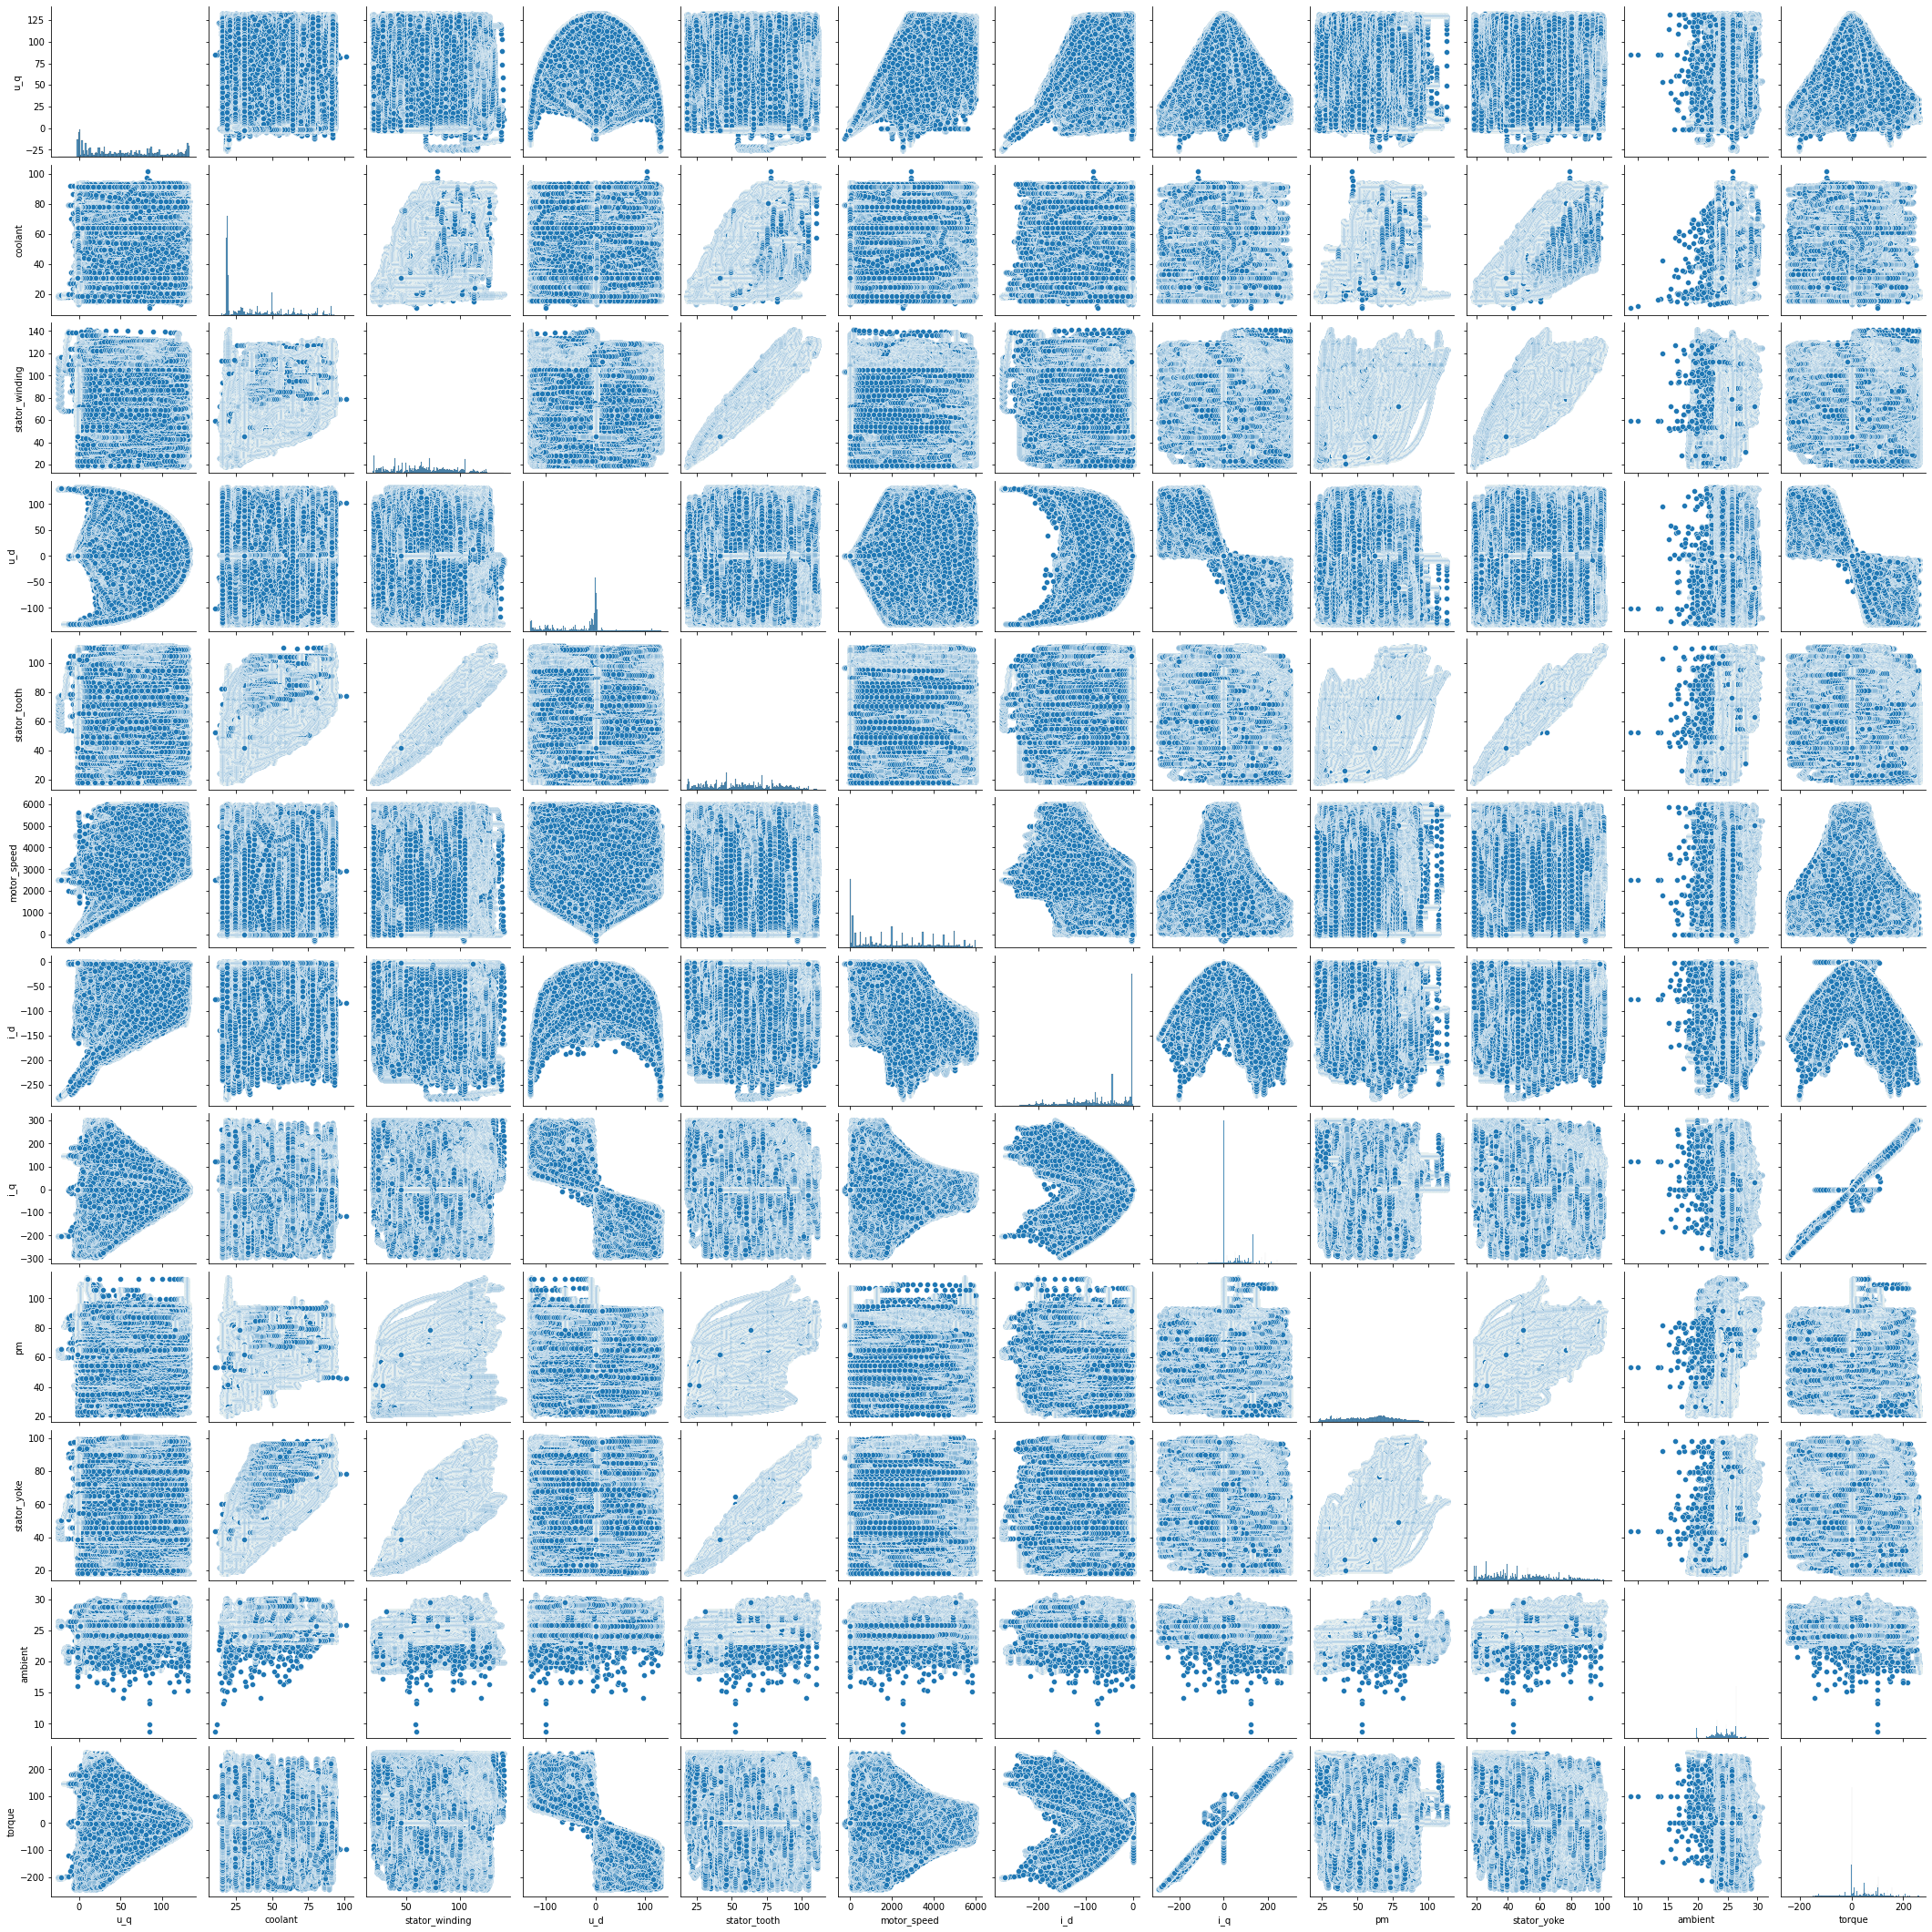

In [ ]:
# Create a dataframe equal to the measures dataframe
correlation_df = measures_df

# Drop the profile_id column
correlation_df.drop("profile_id", axis = 1, inplace = True)

# Create a pairplot that will compare each variable with each other in order to see any correlations
sns.pairplot(correlation_df)

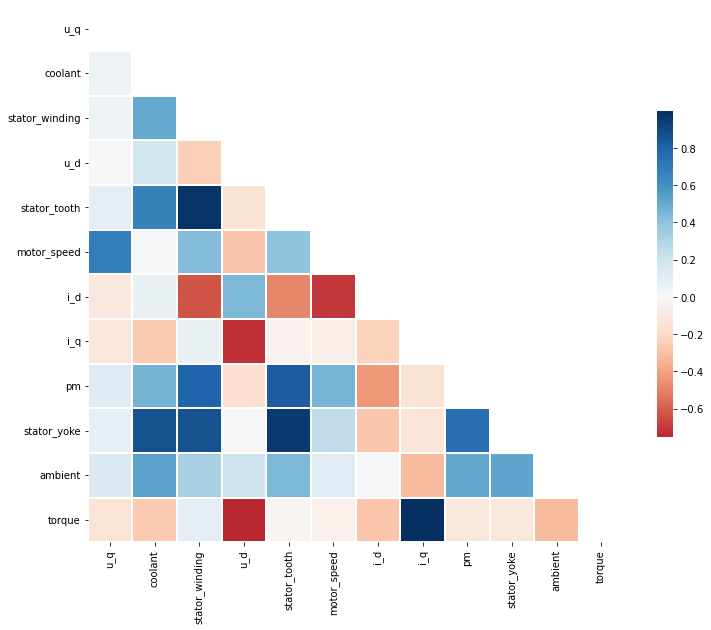

In [ ]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(measures_df.corr()))
plot = sns.heatmap(measures_df.corr(), mask=mask, cmap="RdBu", center=0, square=True, linewidths=1, cbar_kws={"shrink": .60})
plt.yticks(rotation=0)
plt.show()

**Distribution**

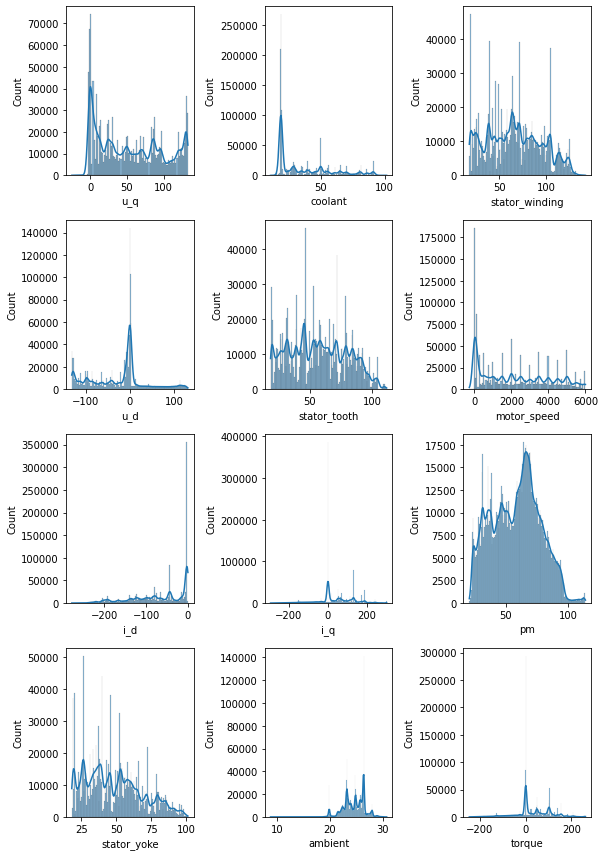

In [ ]:
cols = []
for col in measures_df.columns:
  cols.append(col)

fig, axs = plt.subplots(4, 3, figsize=(8.5, 12))
sns.histplot(measures_df[cols[0]], ax = axs[0, 0], kde=True)
sns.histplot(measures_df[cols[1]], ax = axs[0, 1], kde=True)
sns.histplot(measures_df[cols[2]], ax = axs[0, 2], kde=True)
sns.histplot(measures_df[cols[3]], ax = axs[1, 0], kde=True)
sns.histplot(measures_df[cols[4]], ax = axs[1, 1], kde=True)
sns.histplot(measures_df[cols[5]], ax = axs[1, 2], kde=True)
sns.histplot(measures_df[cols[6]], ax = axs[2, 0], kde=True)
sns.histplot(measures_df[cols[7]], ax = axs[2, 1], kde=True)
sns.histplot(measures_df[cols[8]], ax = axs[2, 2], kde=True)
sns.histplot(measures_df[cols[9]], ax = axs[3, 0], kde=True)
sns.histplot(measures_df[cols[10]], ax = axs[3, 1], kde=True)
sns.histplot(measures_df[cols[11]], ax = axs[3, 2], kde=True)

plt.tight_layout()

plt.show()

**Time Series of Target Variables**

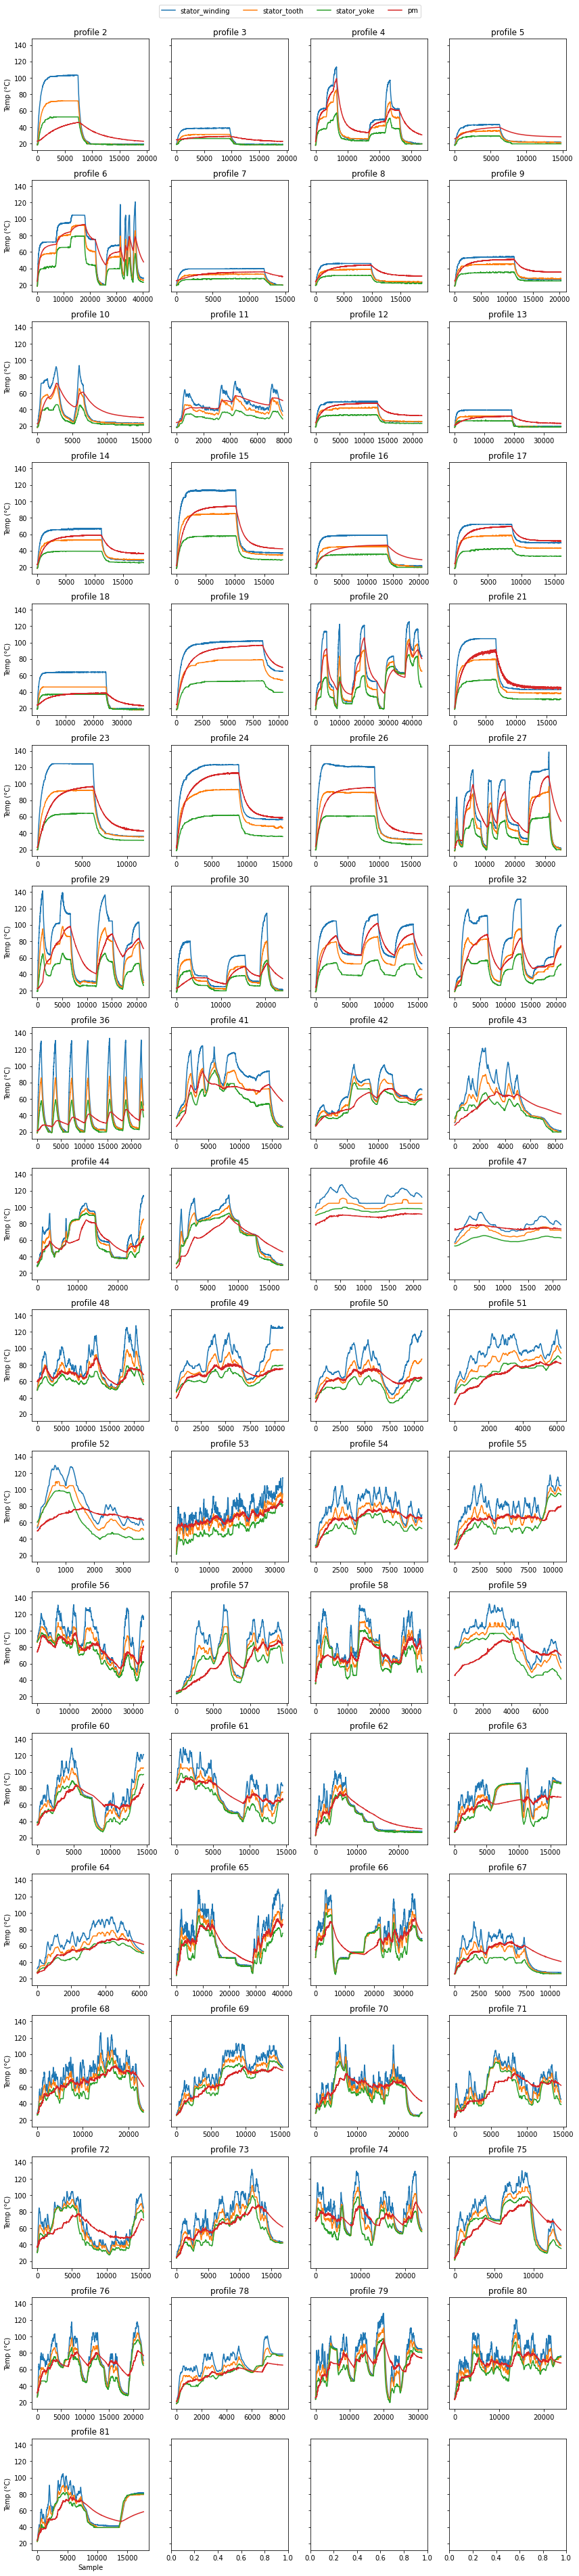

In [ ]:
targetVar = pd.DataFrame(['stator_winding', 'stator_tooth', 'stator_yoke', 'pm'])

numOfRows = np.ceil(81 / 4)

fig, axs = plt.subplots(18, 4, figsize=(12,numOfRows*2.5), sharey=True)

j = 0
k = 0

for i in range(0, 84):
  d = measures_df.loc[measures_df['profile_id'] == i]

  if (d.shape[0] > 0):
    axs[k, j].plot(d[targetVar[0][0]].reset_index(drop=True))
    axs[k, j].plot(d[targetVar[0][1]].reset_index(drop=True))
    axs[k, j].plot(d[targetVar[0][2]].reset_index(drop=True))
    axs[k, j].plot(d[targetVar[0][3]].reset_index(drop=True))
    axs[k, j].set_title(f'profile {i}')

    if j == 0:
      axs[k, j].set_ylabel('Temp (°C)')
    if i > 80:
      axs[k, j].set_xlabel('Sample')

    if j == 3:
      j = 0
      k += 1
    else:
      j += 1

fig.tight_layout()

fig.legend(labels=["stator_winding", "stator_tooth", "stator_yoke", "pm"], ncol=15, loc='lower center', bbox_to_anchor=(.5, 1), bbox_transform=fig.transFigure)

fig.show()

**Time Series of Input Variables**

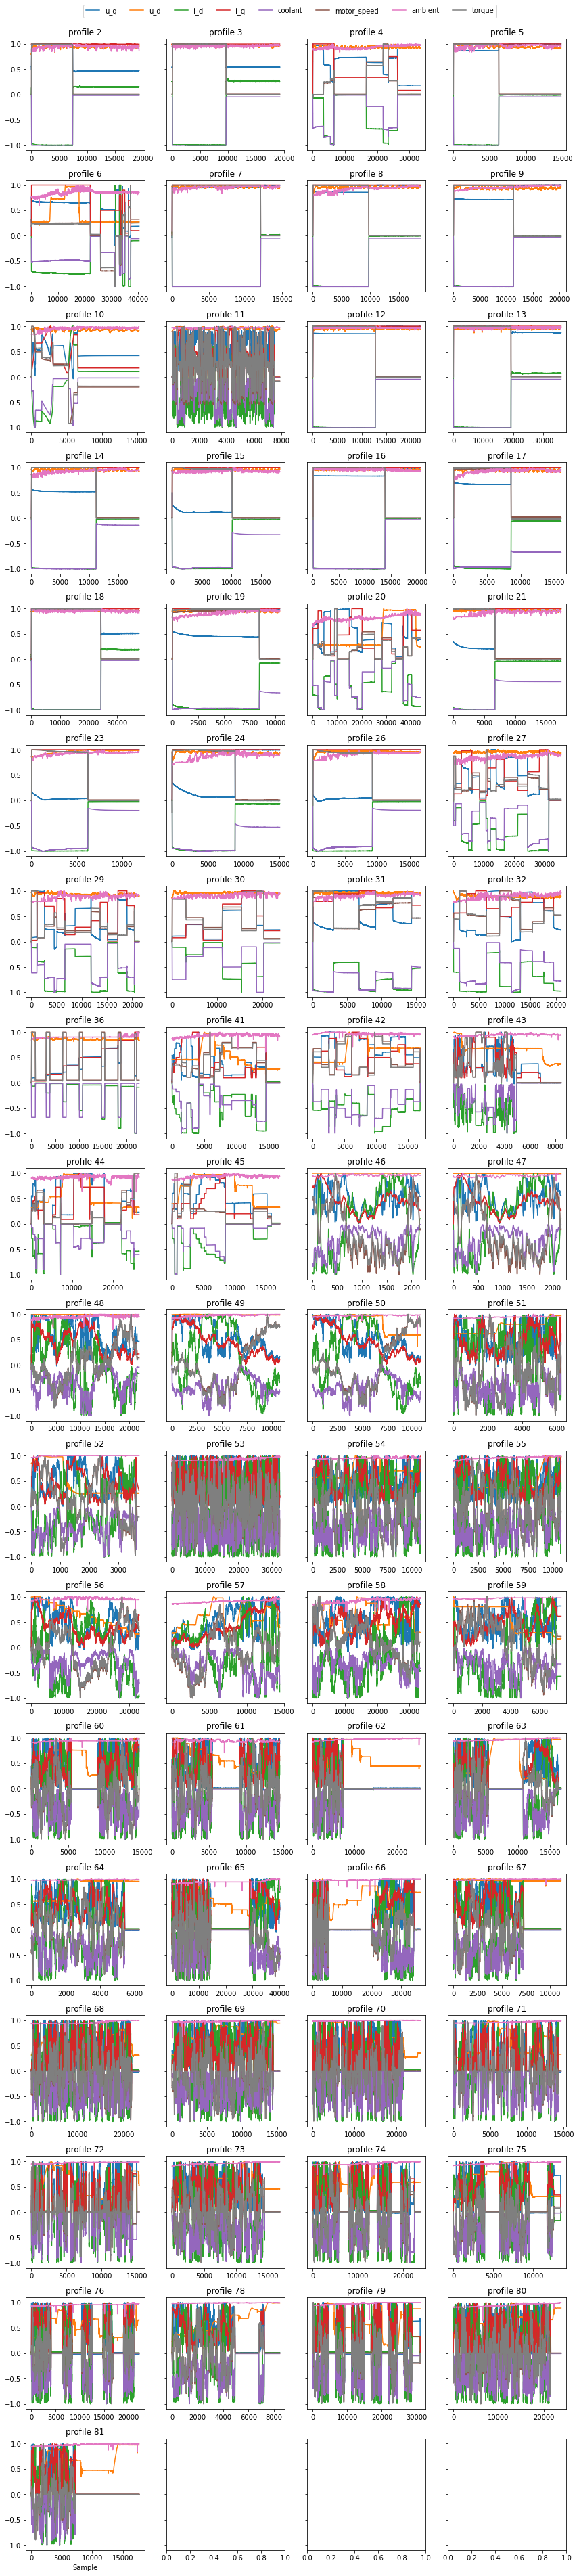

In [ ]:
inputVar = pd.DataFrame(['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'torque'])

numOfRows = np.ceil(81 / 4)

fig, axs = plt.subplots(18, 4, figsize=(12,numOfRows*2.5), sharey=True)

j = 0
k = 0

for i in range(0, 84):
  d = measures_df.loc[measures_df['profile_id'] == i]

  if (d.shape[0] > 0):
    axs[k, j].plot(d[inputVar[0][0]].reset_index(drop=True) / d[inputVar[0][0]].reset_index(drop=True).abs().max()) # normalize between 1 and -1
    axs[k, j].plot(d[inputVar[0][1]].reset_index(drop=True) / d[inputVar[0][1]].reset_index(drop=True).abs().max())
    axs[k, j].plot(d[inputVar[0][2]].reset_index(drop=True) / d[inputVar[0][2]].reset_index(drop=True).abs().max())
    axs[k, j].plot(d[inputVar[0][3]].reset_index(drop=True) / d[inputVar[0][3]].reset_index(drop=True).abs().max())
    axs[k, j].plot(d[inputVar[0][4]].reset_index(drop=True) / d[inputVar[0][4]].reset_index(drop=True).abs().max())
    axs[k, j].plot(d[inputVar[0][5]].reset_index(drop=True) / d[inputVar[0][5]].reset_index(drop=True).abs().max())
    axs[k, j].plot(d[inputVar[0][6]].reset_index(drop=True) / d[inputVar[0][6]].reset_index(drop=True).abs().max())
    axs[k, j].plot(d[inputVar[0][7]].reset_index(drop=True) / d[inputVar[0][7]].reset_index(drop=True).abs().max())
    axs[k, j].set_title(f'profile {i}')

    if j == 0:
      axs[k, j].set_ylabel('Normalized')
    if i > 80:
      axs[k, j].set_xlabel('Sample')

    if j == 3:
      j = 0
      k += 1
    else:
      j += 1

fig.tight_layout()

fig.legend(labels=['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'motor_speed', 'ambient', 'torque'], ncol=15, loc='lower center', bbox_to_anchor=(.5, 1), bbox_transform=fig.transFigure)

fig.show()